In [18]:
from IPython.display import Image, display, HTML

## Linear Models in Finance 

Linear models model target variables as a linear combination inputs plus some probabilistic error term. While simple, these models serve as a very useful starting point to a financial modeling task, are often much more interpretable and useful, efficient to train (particularly in HFT settings), and far more resistant to overfitting with the right modeling techniques. Some points to keep in mind; a standard OLS regression models errors as independent identically distributed (the error on observation $i$ does not depend on previous observations). Financial data is often in a panel format (timestamp | Asset 1 | Asset 2 | ... ), and there is often correlation in both the time dimension and the asset direction, so more complex modeling of error distributions is required. Another major challenge is overfitting, where regularization and shrinkage methods are useful. 

### 1. Standard Baseline - Multiple Linear Regression 

We model some continous output as a linear combination of multiple input variables with coefficients $\beta_i$, where each $\beta_i$ represents the relative importance or contribution of variable $X_i$ to the output variable. This is a model in $P = p + 1$ parameters which can be estimated with several approaches. 

$$y = \beta_0 + \beta_1 X_1 + ... + \beta_p X_p + \epsilon$$
$$ \text{Matrix Formulation: } y = X\beta + \epsilon $$

In [19]:
display(HTML('<div style="text-align: center;">'
             '<img src="plot.png" alt="Plot">'
             '</div>'))

#### The Ordinary Least Squares Approach

For a given data point, our model gives an output $f(x_i)$ while the true output is $y_i$. Our goal is compute the optimal parameter vector or the optimal values for $\beta$ that minimizes the sum of the squared residuals. Another way to visualize this is to compute the hyperplane that "best fits" our data. 

$$ RSS(\beta) = \sum_{i = 1}^N (y_i - f(x_i))^2 $$ 
$$ RSS(\beta) = \sum_{i = 1}^N (y_i - \beta_0 - \sum_{j=1}^p x_{ij} \beta_j)^2$$ 
$$ RSS(\beta) = (y - \beta X)^\text{T}(y - \beta X)$$ 

The optimal parameter values will be as written below. Geometrically, the optimal set of parameters $\hat{\beta}$ are such that $y - \hat{y} = y - \hat{\beta}$ is orthogonal to the column space of $X$. In other words, the optimal parameters allow us to find the vector in the column space of $X$ that is geometrically closest to $y$. 

$$\hat{\beta} = \text{argmin}_{\beta} \hspace{3px} (y - \beta X)^\text{T}(y - \beta X) = (X^\text{T}X)^{-1} X^\text{T} y$$

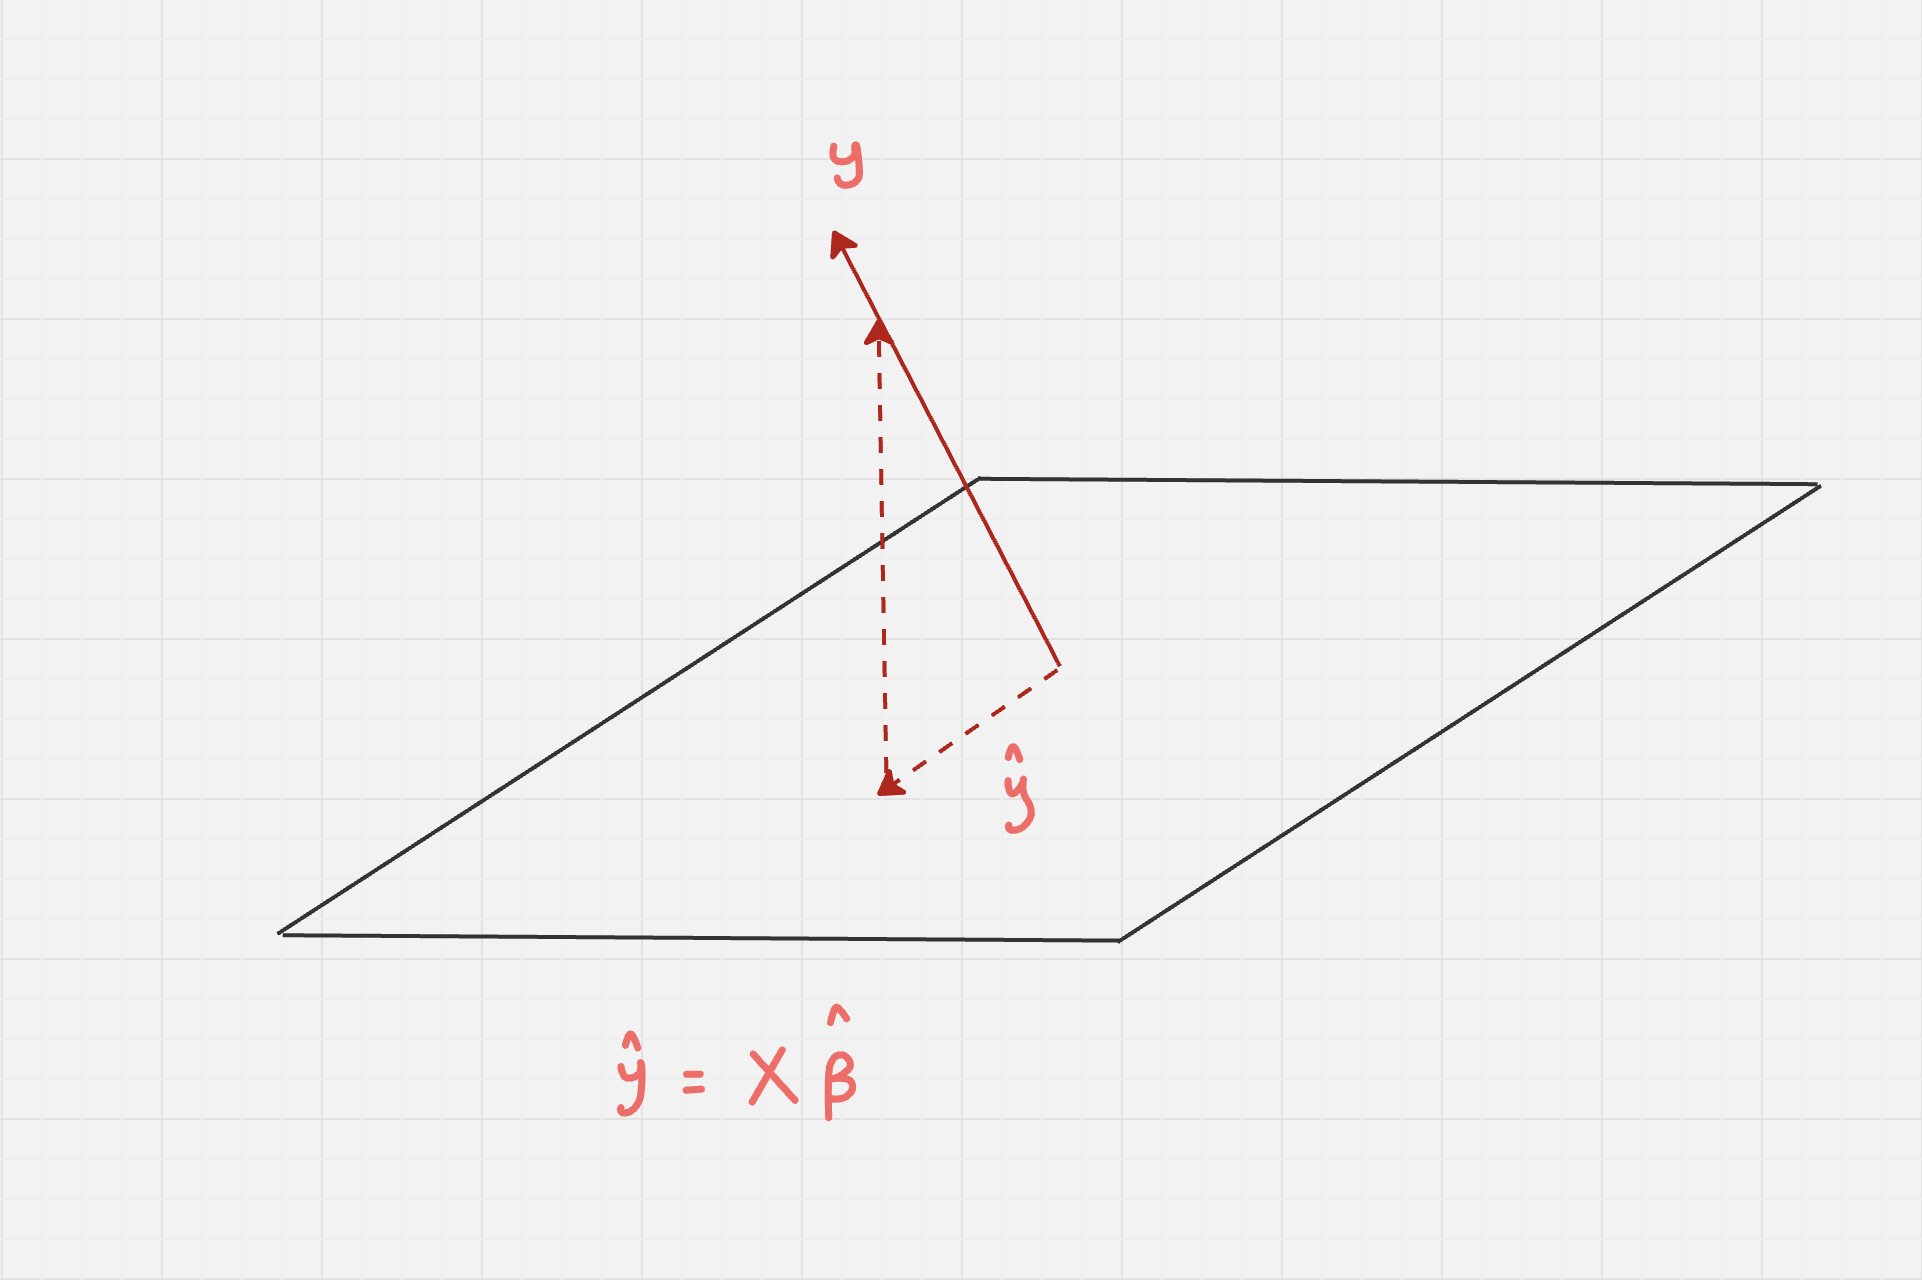

In [10]:
display(Image(filename="OLS.png"))

#### Maximum-Likelihood Estimation Approach
MLE is another approach to computing the parameters for the linear-regression model. The model makes the assumption that $\epsilon$ is $N(0, \sigma^2)$. Thus, we can say that for a particular observation or data point $i$, $y_i | x_i, \beta$ is $N(x_i^\text{T} \beta, \sigma^2)$. From this assumption, we can write the pmf of $y_i$, and take the product over all $i$ since we assume that each observation is independent. We then minimze the natural log of this quantity, which ends up being the same problem as the OLS approach described above. For a detailed derivation, see the Statistical Learning material in this repository. 

$$ \epsilon_i \hspace{5px} \text{∼} \hspace{5px} N(0, \sigma^2) $$
$$ y_i = x_i^\text{T} \beta + \epsilon_i \hspace{5px} \text{∼} \hspace{5px} N(x_i^\text{T} \beta, \sigma^2) $$
$$p(y_i | x_i, \beta) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(y - x_i\beta)^2}{2\sigma}}$$ 
$$\mathcal{L(\beta)} = \prod_{i=0}^n p(y_i | x_i, \beta) = \prod_{i=0}^n \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(y - x_i\beta)^2}{2\sigma}}$$
$$ \hat\beta = \text{argmin}_\beta \hspace{2px} \{-log(\mathcal{L(\beta)})\}$$

#### Gradient Descent 
Gradient descent is a numerical algorithm to compute an optimal solution to an objective function. We can use this approach to compute a solution to the MLE objective function. The algorithm computes the gradient of the objective function and takes a step towards the direction of this minimum, and iterates until a local minimum is reached. For example, we may wish to mathematically minimize the mean-squared error. 

$$J(\beta) = \frac{1}{n} \sum_{i=1}^n (y_i - x_i^\text{T}\beta)^2$$

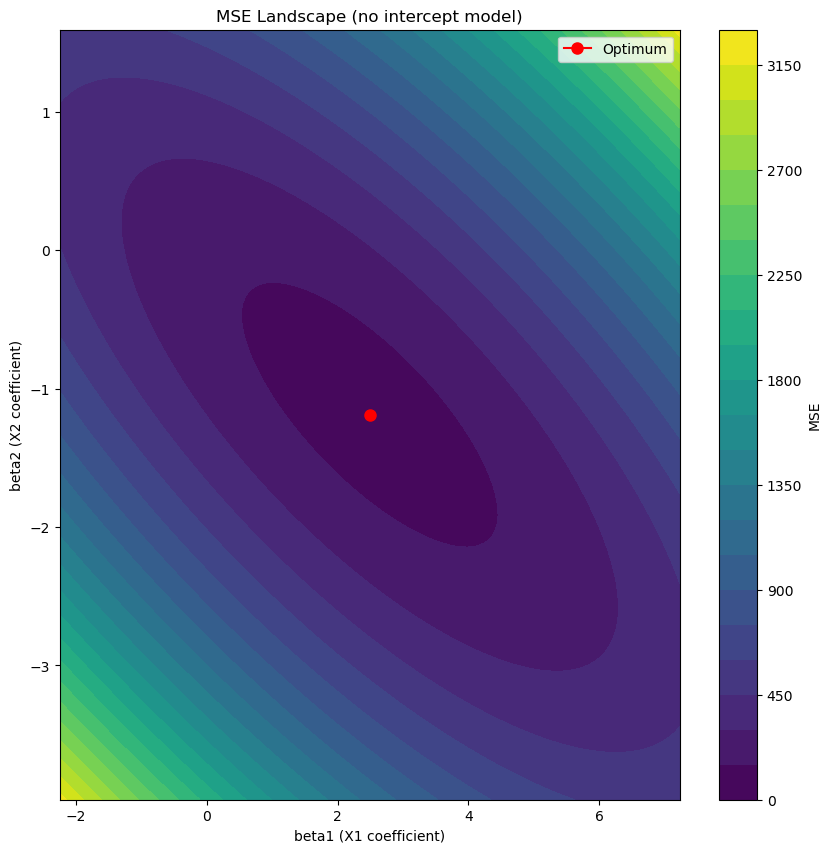

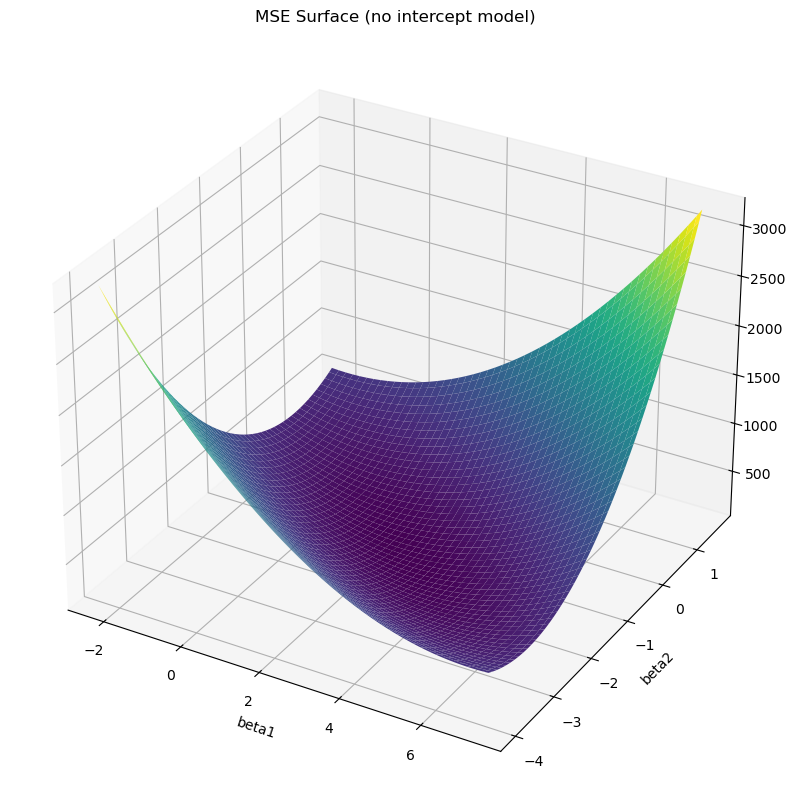

In [16]:
display(Image(filename="mse_landscape.png"))
display(Image(filename="mse_plot.png"))

### 2. Gauss-Markov Theorem, Assumptions behind Linear Regression 